# Course:  Convolutional Neural Networks for Image Classification

## Section-6
### Overfit designed CNNs models in Keras

**Description:**  
*Implement overfitting with small amount of images from prepared datasets  
Plot resulted charts*

**File:** *overfitting.ipynb*

### Algorithm:

**--> Step 1:** Open preprocessed dataset  
**--> Step 2:** Convert classes vectors to binary matrices  
**--> Step 3:** Load saved CNN model  
**--> Step 4:** Set up learning rate & epochs  
**--> Step 5: Overfit loaded CNN model**  
**--> Step 6:** Show and plot accuracies  


**Result:**  
- Plot with training and validation accuracies  


## Importing libraries

In [1]:
# Importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import h5py


from keras.utils.np_utils import to_categorical
from keras.models import load_model
from keras.callbacks import LearningRateScheduler


## Setting up full paths

In [2]:
# Full or absolute path to 'Section4' with preprocessed datasets
# (!) On Windows, the path should look like following:
# r'C:\Users\your_name\PycharmProjects\CNNCourse\Section4'
# or:
# 'C:\\Users\\your_name\\PycharmProjects\\CNNCourse\\Section4'
full_path_to_Section4 = \
    'C:\\Users\\anaso\\OneDrive - Instituto Superior de Engenharia de Lisboa\\CNNCourse\\Section4'


# Full or absolute path to 'Section5' with designed models
# (!) On Windows, the path should look like following:
# r'C:\Users\your_name\PycharmProjects\CNNCourse\Section5'
# or:
# 'C:\\Users\\your_name\\PycharmProjects\\CNNCourse\\Section5'
full_path_to_Section5 = \
    'C:\\Users\\anaso\\OneDrive - Instituto Superior de Engenharia de Lisboa\\CNNCourse\\Section5'


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 1: Opening preprocessed dataset

In [3]:
# Opening saved custom dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'custom' + '/' +
               'dataset_custom_rgb_255_mean_std.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


['x_test', 'x_train', 'x_validation', 'y_test', 'y_train', 'y_validation']


In [4]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(10, 64, 64, 3)
(10,)
(3, 64, 64, 3)
(3,)
(1, 64, 64, 3)
(1,)


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 2: Converting classes vectors to classes matrices

In [5]:
# Showing class index from the vector
print('Class index from vector:', y_train[5])
print()

# Preparing classes to be passed into the model
# Transforming them from vectors to binary matrices
# It is needed to set relationship between classes to be understood by the algorithm
# Such format is commonly used in training and predicting
y_train = to_categorical(y_train, num_classes = 5)
y_validation = to_categorical(y_validation, num_classes = 5)


# Showing shapes of converted vectors into matrices
print(y_train.shape)
print(y_validation.shape)
print()


# Showing class index from the matrix
print('Class index from matrix:', y_train[5])


Class index from vector: 3

(10, 5)
(3, 5)

Class index from matrix: [0. 0. 0. 1. 0.]


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 3: Loading saved model

In [6]:
# Loading 1st model for RGB datasets
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
model = load_model(full_path_to_Section5 + '/' + 'custom' + '/' + 'model_1_custom_rgb.h5')

# Check point
print('Model is successfully loaded')


Model is successfully loaded


In [7]:
# Showing model's summary in table format
print(model.summary())
print()


# Showing dropout rate
print('Dropout rate: ', model.layers[2].rate)

# Showing strides for the 1st layer (convolutional)
print('Strides of the 1st convolutional layer: ', model.layers[0].strides)

# Showing strides for the 2nd layer (average pooling)
print('Strides of the average pooling layer: ', model.layers[1].strides)
print()

# Showing configurations for entire model
# print(model.get_config())

# Showing configurations for specific layers
print('Full configuration details of the 1st layer:\n', model.get_config()['layers'][0])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        4864      
_________________________________________________________________
average_pooling2d (AveragePo (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       204928    
_________________________________________________________________
average_pooling2d_1 (Average (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       8

### RGB custom dataset (255.0 ==> mean ==> std)

## Step 4: Setting up learning rate & epochs

In [8]:
# Defining number of epochs
epochs = 50

# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs), verbose=1)

# Check point
print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### RGB custom dataset (255.0 ==> mean ==> std)

## Step 5: Overfitting loaded CNN model

In [9]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Training model
h = model.fit(x_train[:100], y_train[:100],
                        batch_size=1,
                        epochs=epochs,
                        validation_data=(x_validation[:500], y_validation[:500]),
                        callbacks=[learning_rate],
                        verbose=1)



Epoch 00001: LearningRateScheduler reducing learning rate to 7.694497527671315e-05.
Epoch 1/50
10/10 [==============================] - 2s 164ms/step - loss: 1.2778 - accuracy: 0.6000 - val_loss: 0.4442 - val_accuracy: 1.0000

Epoch 00002: LearningRateScheduler reducing learning rate to 7.30977265128775e-05.
Epoch 2/50
10/10 [==============================] - 1s 125ms/step - loss: 0.9149 - accuracy: 0.7000 - val_loss: 0.3245 - val_accuracy: 1.0000

Epoch 00003: LearningRateScheduler reducing learning rate to 6.94428401872336e-05.
Epoch 3/50
10/10 [==============================] - 1s 116ms/step - loss: 0.6661 - accuracy: 0.7000 - val_loss: 0.7184 - val_accuracy: 1.0000

Epoch 00004: LearningRateScheduler reducing learning rate to 6.597069817787194e-05.
Epoch 4/50
10/10 [==============================] - 1s 115ms/step - loss: 0.6740 - accuracy: 0.7000 - val_loss: 0.4787 - val_accuracy: 1.0000

Epoch 00005: LearningRateScheduler reducing learning rate to 6.267216326897833e-05.
Epoch 5/5

10/10 [==============================] - 1s 103ms/step - loss: 7.3614e-04 - accuracy: 1.0000 - val_loss: 1.9433 - val_accuracy: 0.6667

Epoch 00037: LearningRateScheduler reducing learning rate to 1.2140317781059324e-05.
Epoch 37/50
10/10 [==============================] - 1s 101ms/step - loss: 7.0550e-04 - accuracy: 1.0000 - val_loss: 1.9487 - val_accuracy: 0.6667

Epoch 00038: LearningRateScheduler reducing learning rate to 1.1533301892006358e-05.
Epoch 38/50
10/10 [==============================] - 1s 105ms/step - loss: 4.7350e-04 - accuracy: 1.0000 - val_loss: 1.9522 - val_accuracy: 0.6667

Epoch 00039: LearningRateScheduler reducing learning rate to 1.095663679740604e-05.
Epoch 39/50
10/10 [==============================] - 1s 99ms/step - loss: 4.8292e-04 - accuracy: 1.0000 - val_loss: 1.9561 - val_accuracy: 0.6667

Epoch 00040: LearningRateScheduler reducing learning rate to 1.0408804957535738e-05.
Epoch 40/50
10/10 [==============================] - 1s 106ms/step - loss: 4.7859e

### RGB custom dataset (255.0 ==> mean ==> std)

## Step 6: Showing and plotting accuracies

In [10]:
# Accuracies of the model
print('Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                             format(max(h.history['accuracy']),
                                                                    max(h.history['val_accuracy'])))


Training accuracy=1.00000, Validation accuracy=1.00000


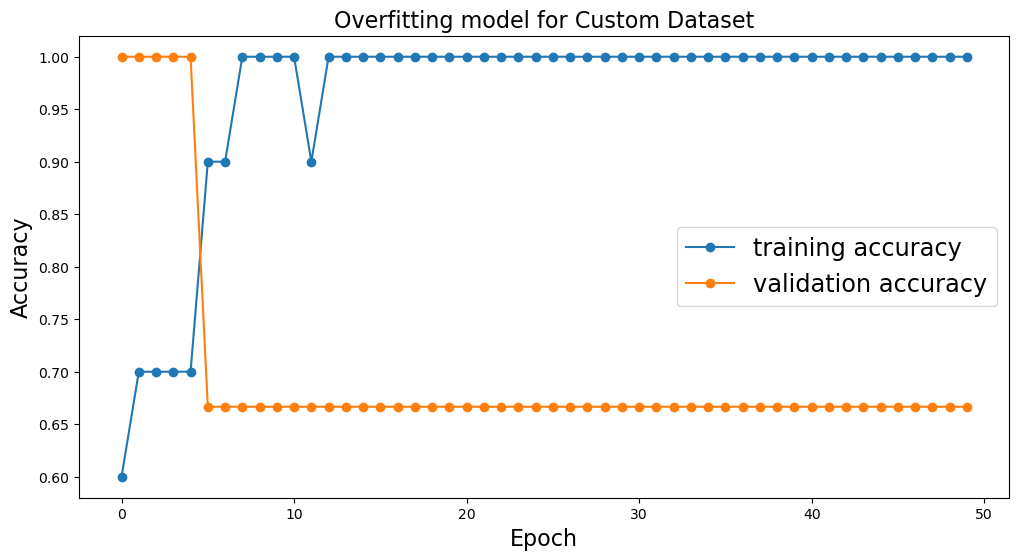

In [11]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies for every model
plt.plot(h.history['accuracy'], '-o')
plt.plot(h.history['val_accuracy'], '-o')


# Showing legend
plt.legend(['training accuracy', 'validation accuracy'], loc='center right', fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Giving name to the plot
plt.title('Overfitting model for Custom Dataset', fontsize=16)


# Saving plot
plt.savefig('overfitted_model_of_custom_dataset.png', dpi=500)


# Showing the plot
plt.show()


### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 1: Opening preprocessed dataset

In [12]:
# Opening saved CIFAR-10 dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'cifar10' + '/' +
               'dataset_cifar10_rgb_255_mean_std.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables    
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables 
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables 
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


['x_test', 'x_train', 'x_validation', 'y_test', 'y_train', 'y_validation']


In [13]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(42500, 32, 32, 3)
(42500,)
(7500, 32, 32, 3)
(7500,)
(10000, 32, 32, 3)
(10000,)


### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 2: Converting classes vectors to classes matrices

In [14]:
# Showing class index from the vector
print('Class index from vector:', y_train[5])
print()

# Preparing classes to be passed into the model
# Transforming them from vectors to binary matrices
# It is needed to set relationship between classes to be understood by the algorithm
# Such format is commonly used in training and predicting
y_train = to_categorical(y_train, num_classes = 10)
y_validation = to_categorical(y_validation, num_classes = 10)


# Showing shapes of converted vectors into matrices
print(y_train.shape)
print(y_validation.shape)
print()


# Showing class index from the matrix
print('Class index from matrix:', y_train[5])


Class index from vector: 3

(42500, 10)
(7500, 10)

Class index from matrix: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 3: Loading saved model

In [15]:
# Loading 1st model for RGB datasets
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
model = load_model(full_path_to_Section5 + '/' + 'cifar10' + '/' + 'model_1_cifar10_rgb.h5')

# Check point
print('Model is successfully loaded')


Model is successfully loaded


In [16]:
# Showing model's summary in table format
print(model.summary())
print()


# Showing dropout rate
print('Dropout rate: ', model.layers[2].rate)

# Showing strides for the 1st layer (convolutional)
print('Strides of the 1st convolutional layer: ', model.layers[0].strides)

# Showing strides for the 2nd layer (max pooling)
print('Strides of the max pooling layer: ', model.layers[1].strides)
print()

# Showing configurations for entire model
# print(model.get_config())

# Showing configurations for specific layers
print('Full configuration details of the 1st layer:\n', model.get_config()['layers'][0])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 128)       9728      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 256)       819456    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 512)        

### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 4: Setting up learning rate & epochs

In [17]:
# Defining number of epochs
epochs = 50

# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs), verbose=1)

# Check point
print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 5: Overfitting loaded CNN model

In [18]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Training model
h = model.fit(x_train[:100], y_train[:100],
                        batch_size=1,
                        epochs=epochs,
                        validation_data=(x_validation[:500], y_validation[:500]),
                        callbacks=[learning_rate],
                        verbose=1)



Epoch 00001: LearningRateScheduler reducing learning rate to 7.694497527671315e-05.
Epoch 1/50
100/100 [==============================] - 9s 93ms/step - loss: 2.4761 - accuracy: 0.0800 - val_loss: 2.3015 - val_accuracy: 0.0900

Epoch 00002: LearningRateScheduler reducing learning rate to 7.30977265128775e-05.
Epoch 2/50
100/100 [==============================] - 9s 89ms/step - loss: 2.3078 - accuracy: 0.1100 - val_loss: 2.2744 - val_accuracy: 0.1520

Epoch 00003: LearningRateScheduler reducing learning rate to 6.94428401872336e-05.
Epoch 3/50
100/100 [==============================] - 9s 88ms/step - loss: 2.1923 - accuracy: 0.2200 - val_loss: 2.2311 - val_accuracy: 0.1880

Epoch 00004: LearningRateScheduler reducing learning rate to 6.597069817787194e-05.
Epoch 4/50
100/100 [==============================] - 9s 88ms/step - loss: 2.0803 - accuracy: 0.2600 - val_loss: 2.1752 - val_accuracy: 0.1960

Epoch 00005: LearningRateScheduler reducing learning rate to 6.267216326897833e-05.
Epoch

100/100 [==============================] - 9s 89ms/step - loss: 0.2647 - accuracy: 0.9200 - val_loss: 3.2043 - val_accuracy: 0.2620

Epoch 00037: LearningRateScheduler reducing learning rate to 1.2140317781059324e-05.
Epoch 37/50
100/100 [==============================] - 9s 85ms/step - loss: 0.2432 - accuracy: 0.9400 - val_loss: 3.1775 - val_accuracy: 0.2560

Epoch 00038: LearningRateScheduler reducing learning rate to 1.1533301892006358e-05.
Epoch 38/50
100/100 [==============================] - 9s 89ms/step - loss: 0.2756 - accuracy: 0.9000 - val_loss: 3.2557 - val_accuracy: 0.2500

Epoch 00039: LearningRateScheduler reducing learning rate to 1.095663679740604e-05.
Epoch 39/50
100/100 [==============================] - 9s 90ms/step - loss: 0.2339 - accuracy: 0.9400 - val_loss: 3.3115 - val_accuracy: 0.2500

Epoch 00040: LearningRateScheduler reducing learning rate to 1.0408804957535738e-05.
Epoch 40/50
100/100 [==============================] - 8s 80ms/step - loss: 0.2799 - accuracy

### RGB CIFAR-10 dataset (255.0 ==> mean ==> std)

## Step 6: Showing and plotting accuracies

In [19]:
# Accuracies of the model
print('Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                             format(max(h.history['accuracy']),
                                                                    max(h.history['val_accuracy'])))


Training accuracy=0.98000, Validation accuracy=0.26200


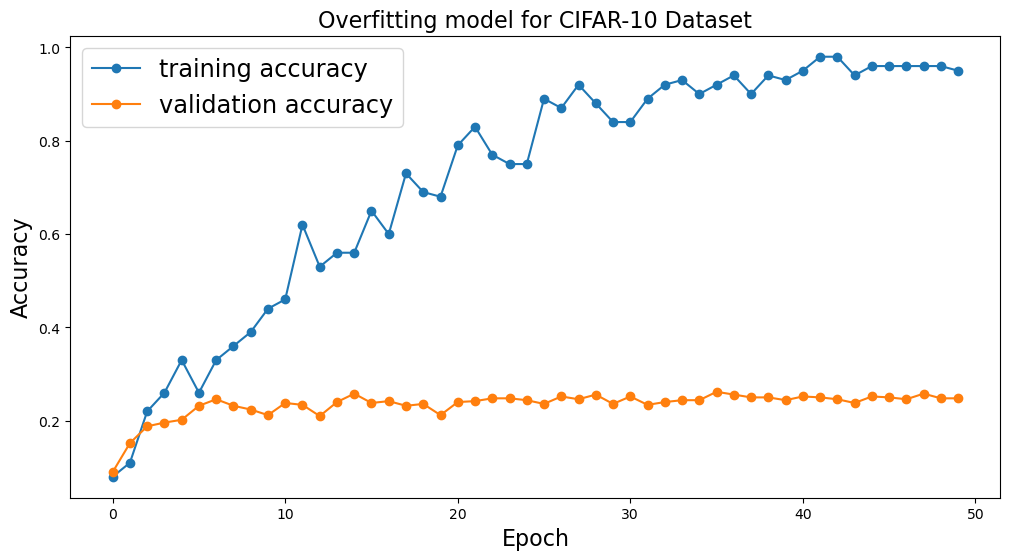

In [20]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies for every model
plt.plot(h.history['accuracy'], '-o')
plt.plot(h.history['val_accuracy'], '-o')


# Showing legend
plt.legend(['training accuracy', 'validation accuracy'], loc='upper left', fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Giving name to the plot
plt.title('Overfitting model for CIFAR-10 Dataset', fontsize=16)


# Saving plot
plt.savefig('overfitted_model_of_cifar10_dataset.png', dpi=500)


# Showing the plot
plt.show()


### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 1: Opening preprocessed dataset

In [21]:
# Opening saved MNIST dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'mnist' + '/' +
               'dataset_mnist_gray_255_mean_std.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables    
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables 
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables 
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


['x_test', 'x_train', 'x_validation', 'y_test', 'y_train', 'y_validation']


In [22]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(51000, 28, 28, 1)
(51000,)
(9000, 28, 28, 1)
(9000,)
(10000, 28, 28, 1)
(10000,)


### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 2: Converting classes vectors to classes matrices

In [23]:
# Showing class index from the vector
print('Class index from vector:', y_train[5])
print()

# Preparing classes to be passed into the model
# Transforming them from vectors to binary matrices
# It is needed to set relationship between classes to be understood by the algorithm
# Such format is commonly used in training and predicting
y_train = to_categorical(y_train, num_classes = 10)
y_validation = to_categorical(y_validation, num_classes = 10)


# Showing shapes of converted vectors into matrices
print(y_train.shape)
print(y_validation.shape)
print()


# Showing class index from the matrix
print('Class index from matrix:', y_train[5])


Class index from vector: 6

(51000, 10)
(9000, 10)

Class index from matrix: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 3: Loading saved model

In [24]:
# Loading 1st model for GRAY datasets
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
model = load_model(full_path_to_Section5 + '/' + 'mnist' + '/' + 'model_1_mnist_gray.h5')

# Check point
print('Model is successfully loaded')


Model is successfully loaded


In [25]:
# Showing model's summary in table format
print(model.summary())
print()


# Showing dropout rate
print('Dropout rate: ', model.layers[2].rate)

# Showing strides for the 1st layer (convolutional)
print('Strides of the 1st convolutional layer: ', model.layers[0].strides)

# Showing strides for the 2nd layer (convolutional with strides 2)
print('Strides of the 2nd convolutional layer: ', model.layers[1].strides)
print()

# Showing configurations for entire model
# print(model.get_config())

# Showing configurations for specific layers
print('Full configuration details of the 1st layer:\n', model.get_config()['layers'][0])


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 128)       3328      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 128)       65664     
_________________________________________________________________
dropout_26 (Dropout)         (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 256)       819456    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 256)         262400    
_________________________________________________________________
dropout_27 (Dropout)         (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 512)        

### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 4: Setting up learning rate & epochs

In [26]:
# Defining number of epochs
epochs = 50

# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs), verbose=1)

# Check point
print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 5: Overfitting loaded CNN model

In [27]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Training model
h = model.fit(x_train[:20], y_train[:20],
                        batch_size=1,
                        epochs=epochs,
                        validation_data=(x_validation[:500], y_validation[:500]),
                        callbacks=[learning_rate],
                        verbose=1)



Epoch 00001: LearningRateScheduler reducing learning rate to 7.694497527671315e-05.
Epoch 1/50
20/20 [==============================] - 5s 240ms/step - loss: 2.2983 - accuracy: 0.2500 - val_loss: 2.3008 - val_accuracy: 0.0960

Epoch 00002: LearningRateScheduler reducing learning rate to 7.30977265128775e-05.
Epoch 2/50
20/20 [==============================] - 5s 253ms/step - loss: 2.1318 - accuracy: 0.3000 - val_loss: 2.4431 - val_accuracy: 0.0960

Epoch 00003: LearningRateScheduler reducing learning rate to 6.94428401872336e-05.
Epoch 3/50
20/20 [==============================] - 5s 233ms/step - loss: 1.9920 - accuracy: 0.3000 - val_loss: 2.3664 - val_accuracy: 0.0960

Epoch 00004: LearningRateScheduler reducing learning rate to 6.597069817787194e-05.
Epoch 4/50
20/20 [==============================] - 5s 242ms/step - loss: 1.9827 - accuracy: 0.3000 - val_loss: 2.4047 - val_accuracy: 0.0960

Epoch 00005: LearningRateScheduler reducing learning rate to 6.267216326897833e-05.
Epoch 5/5


Epoch 00037: LearningRateScheduler reducing learning rate to 1.2140317781059324e-05.
Epoch 37/50
20/20 [==============================] - 5s 271ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 4.1918 - val_accuracy: 0.4340

Epoch 00038: LearningRateScheduler reducing learning rate to 1.1533301892006358e-05.
Epoch 38/50
20/20 [==============================] - 5s 248ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 4.2505 - val_accuracy: 0.4340

Epoch 00039: LearningRateScheduler reducing learning rate to 1.095663679740604e-05.
Epoch 39/50
20/20 [==============================] - 5s 250ms/step - loss: 0.0824 - accuracy: 0.9500 - val_loss: 3.9725 - val_accuracy: 0.4360

Epoch 00040: LearningRateScheduler reducing learning rate to 1.0408804957535738e-05.
Epoch 40/50
20/20 [==============================] - 5s 243ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 3.9833 - val_accuracy: 0.4380

Epoch 00041: LearningRateScheduler reducing learning rate to 9.88836470965895e-06.
E

### GRAY MNIST dataset (255.0 ==> mean ==> std)

## Step 6: Showing and plotting accuracies

In [28]:
# Accuracies of the model
print('Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                             format(max(h.history['accuracy']),
                                                                    max(h.history['val_accuracy'])))


Training accuracy=1.00000, Validation accuracy=0.46000


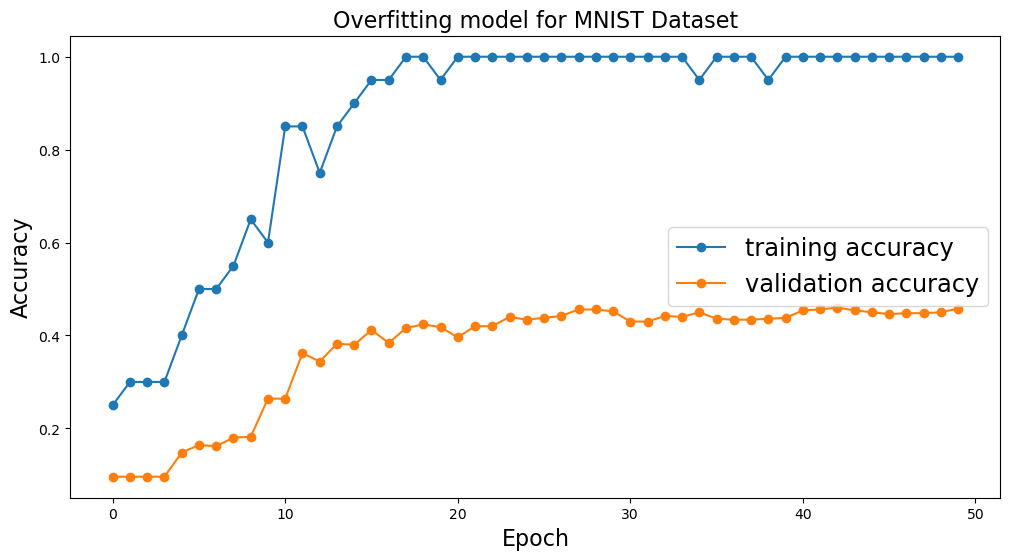

In [29]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies for every model
plt.plot(h.history['accuracy'], '-o')
plt.plot(h.history['val_accuracy'], '-o')


# Showing legend
plt.legend(['training accuracy', 'validation accuracy'], loc='center right', fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Giving name to the plot
plt.title('Overfitting model for MNIST Dataset', fontsize=16)


# Saving plot
plt.savefig('overfitted_model_of_mnist_dataset.png', dpi=500)


# Showing the plot
plt.show()


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 1: Opening preprocessed dataset

In [30]:
# Opening saved Traffic Signs dataset from HDF5 binary file
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'ts' + '/' +
               'dataset_ts_rgb_255_mean_std.hdf5', 'r') as f:
    
    # Showing all keys in the HDF5 binary file
    print(list(f.keys()))
    
    # Extracting saved arrays for training by appropriate keys
    # Saving them into new variables    
    x_train = f['x_train']  # HDF5 dataset
    y_train = f['y_train']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_train = np.array(x_train)  # Numpy arrays
    y_train = np.array(y_train)  # Numpy arrays
    
    
    # Extracting saved arrays for validation by appropriate keys
    # Saving them into new variables 
    x_validation = f['x_validation']  # HDF5 dataset
    y_validation = f['y_validation']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_validation = np.array(x_validation)  # Numpy arrays
    y_validation = np.array(y_validation)  # Numpy arrays
    
    
    # Extracting saved arrays for testing by appropriate keys
    # Saving them into new variables 
    x_test = f['x_test']  # HDF5 dataset
    y_test = f['y_test']  # HDF5 dataset
    # Converting them into Numpy arrays
    x_test = np.array(x_test)  # Numpy arrays
    y_test = np.array(y_test)  # Numpy arrays


['x_test', 'x_train', 'x_validation', 'y_test', 'y_train', 'y_validation']


In [31]:
# Showing types of loaded arrays
print(type(x_train))
print(type(y_train))
print(type(x_validation))
print(type(y_validation))
print(type(x_test))
print(type(y_test))
print()


# Showing shapes of loaded arrays
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>

(36288, 48, 48, 3)
(36288,)
(12440, 48, 48, 3)
(12440,)
(3111, 48, 48, 3)
(3111,)


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 2: Converting classes vectors to classes matrices

In [32]:
# Showing class index from the vector
print('Class index from vector:', y_train[5])
print()

# Preparing classes to be passed into the model
# Transforming them from vectors to binary matrices
# It is needed to set relationship between classes to be understood by the algorithm
# Such format is commonly used in training and predicting
y_train = to_categorical(y_train, num_classes = 43)
y_validation = to_categorical(y_validation, num_classes = 43)


# Showing shapes of converted vectors into matrices
print(y_train.shape)
print(y_validation.shape)
print()


# Showing class index from the matrix
print('Class index from matrix:', y_train[5])


Class index from vector: 38

(36288, 43)
(12440, 43)

Class index from matrix: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 3: Loading saved model

In [33]:
# Loading 1st model for RGB datasets
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
model = load_model(full_path_to_Section5 + '/' + 'ts' + '/' + 'model_1_ts_rgb.h5')

# Check point
print('Model is successfully loaded')


Model is successfully loaded


In [34]:
# Showing model's summary in table format
print(model.summary())
print()


# Showing dropout rate
print('Dropout rate: ', model.layers[2].rate)

# Showing strides for the 1st layer (convolutional)
print('Strides of the 1st convolutional layer: ', model.layers[0].strides)

# Showing strides for the 2nd layer (max pooling)
print('Strides of the max pooling layer: ', model.layers[1].strides)
print()

# Showing configurations for entire model
# print(model.get_config())

# Showing configurations for specific layers
print('Full configuration details of the 1st layer:\n', model.get_config()['layers'][0])


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 48, 48, 128)       9728      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 24, 24, 256)       819456    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 12, 12, 512)     

### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 4: Setting up learning rate & epochs

In [35]:
# Defining number of epochs
epochs = 50

# Defining schedule to update learning rate
learning_rate = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs), verbose=1)

# Check point
print('Number of epochs and schedule for learning rate are set successfully')


Number of epochs and schedule for learning rate are set successfully


### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 5: Overfitting loaded CNN model

In [36]:
# If you're using Nvidia GPU and 'cnngpu' environment, there might be an issue like:
'''Failed to get convolution algorithm. This is probably because cuDNN failed to initialize'''
# In this case, close all Jupyter Notebooks, close Terminal Window or Anaconda Prompt
# Open again just this one Jupyter Notebook and run it


# Training model
h = model.fit(x_train[:100], y_train[:100],
                        batch_size=1,
                        epochs=epochs,
                        validation_data=(x_validation[:500], y_validation[:500]),
                        callbacks=[learning_rate],
                        verbose=1)



Epoch 00001: LearningRateScheduler reducing learning rate to 7.694497527671315e-05.
Epoch 1/50
100/100 [==============================] - 30s 296ms/step - loss: 3.8103 - accuracy: 0.0300 - val_loss: 3.6696 - val_accuracy: 0.0480

Epoch 00002: LearningRateScheduler reducing learning rate to 7.30977265128775e-05.
Epoch 2/50
100/100 [==============================] - 30s 297ms/step - loss: 3.5128 - accuracy: 0.1000 - val_loss: 3.6699 - val_accuracy: 0.0500

Epoch 00003: LearningRateScheduler reducing learning rate to 6.94428401872336e-05.
Epoch 3/50


KeyboardInterrupt: 

### RGB Traffic Signs dataset (255.0 ==> mean ==> std)

## Step 6: Showing and plotting accuracies

In [ ]:
# Accuracies of the model
print('Training accuracy={0:.5f}, Validation accuracy={1:.5f}'.
                                                             format(max(h.history['accuracy']),
                                                                    max(h.history['val_accuracy'])))


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12.0, 6.0)


# Plotting accuracies for every model
plt.plot(h.history['accuracy'], '-o')
plt.plot(h.history['val_accuracy'], '-o')


# Showing legend
plt.legend(['training accuracy', 'validation accuracy'], loc='upper left', fontsize='xx-large')


# Giving name to axes
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)


# Giving name to the plot
plt.title('Overfitting model for Traffic Signs Dataset', fontsize=16)


# Saving plot
plt.savefig('overfitted_model_of_ts_dataset.png', dpi=500)


# Showing the plot
plt.show()


### Some comments

To get more details for usage of 'load_model' function:  
**print(help(load_model))**  
  
More details and examples are here:  
https://keras.io/api/models/model_saving_apis/#loadmodel-function


In [ ]:
print(help(load_model))